In [29]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import RandomForestClassifier
# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor
from xgboost import XGBRegressor
# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 
import xgboost as xgb
# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']
from sklearn.ensemble import AdaBoostClassifier
from datetime import datetime
# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from pprint import pprint

In [30]:
df = pd.read_csv('Traffic_Volume.csv')
df = df.replace({np.nan: None})
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['weekday'] = df['date_time'].dt.weekday
df['hour'] = df['date_time'].dt.hour
df.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,month,weekday,hour
0,None,288.28,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545,10,1,9
1,None,289.36,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516,10,1,10
2,None,289.58,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767,10,1,11
3,None,290.13,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026,10,1,12
4,None,291.14,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918,10,1,13


In [31]:
df.loc[df['weekday'] == 0, 'weekday'] = 'Monday'
df.loc[df['weekday'] == 1, 'weekday'] = 'Tuesday'
df.loc[df['weekday'] == 2, 'weekday'] = 'Wednesday'
df.loc[df['weekday'] == 3, 'weekday'] = 'Thursday'
df.loc[df['weekday'] == 4, 'weekday'] = 'Friday'
df.loc[df['weekday'] == 5, 'weekday'] = 'Saturday'
df.loc[df['weekday'] == 6, 'weekday'] = 'Sunday'

In [32]:
df.loc[df['month'] == 1, 'month'] = 'January'
df.loc[df['month'] == 2, 'month'] = 'February'
df.loc[df['month'] == 3, 'month'] = 'March'
df.loc[df['month'] == 4, 'month'] = 'April'
df.loc[df['month'] == 5, 'month'] = 'May'
df.loc[df['month'] == 6, 'month'] = 'June'
df.loc[df['month'] == 7, 'month'] = 'July'
df.loc[df['month'] == 8, 'month'] = 'August'
df.loc[df['month'] == 9, 'month'] = 'September'
df.loc[df['month'] == 10, 'month'] = 'October'
df.loc[df['month'] == 11, 'month'] = 'November'
df.loc[df['month'] == 12, 'month'] = 'December'

In [33]:
df = df.drop(columns = ['date_time'])
X = df.drop(columns = ['traffic_volume'])
y = df['traffic_volume']


In [34]:
X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,month,weekday,hour
0,None,288.28,0.0,0.0,40,Clouds,October,Tuesday,9
1,None,289.36,0.0,0.0,75,Clouds,October,Tuesday,10
2,None,289.58,0.0,0.0,90,Clouds,October,Tuesday,11
3,None,290.13,0.0,0.0,90,Clouds,October,Tuesday,12
4,None,291.14,0.0,0.0,75,Clouds,October,Tuesday,13
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,September,Sunday,19
48200,None,282.76,0.0,0.0,90,Clouds,September,Sunday,20
48201,None,282.73,0.0,0.0,90,Thunderstorm,September,Sunday,21
48202,None,282.09,0.0,0.0,90,Clouds,September,Sunday,22


In [35]:

X['hour'] = X['hour'].astype(str)
X.dtypes

holiday          object
temp            float64
rain_1h         float64
snow_1h         float64
clouds_all        int64
weather_main     object
month            object
weekday          object
hour             object
dtype: object

In [36]:
X_encoded = pd.get_dummies(X, columns=['holiday', 'weather_main', 'month', 'weekday', 'hour'])
X_encoded.head()
X_encoded.dtypes

temp                     float64
rain_1h                  float64
snow_1h                  float64
clouds_all                 int64
holiday_Christmas Day       bool
                          ...   
hour_5                      bool
hour_6                      bool
hour_7                      bool
hour_8                      bool
hour_9                      bool
Length: 69, dtype: object

In [37]:
X_encoded = X_encoded*1

In [38]:
train_x, test_x, train_y, test_y = train_test_split(X_encoded, y, test_size=.2)
# create model instance
bst = XGBRegressor(randomstate = 42)
# fit model
bst.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
# Predict Test Set
y_pred = bst.predict(test_x)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
print('R-squared on Test Set: %0.2f' %r2)

RMSE_test = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
print('RMSE on Test Set: %0.2f' %RMSE_test)

R-squared on Test Set: 0.95
RMSE on Test Set: 460.17


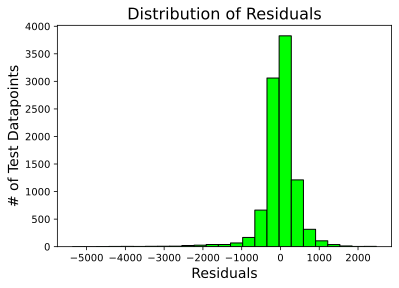

In [40]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

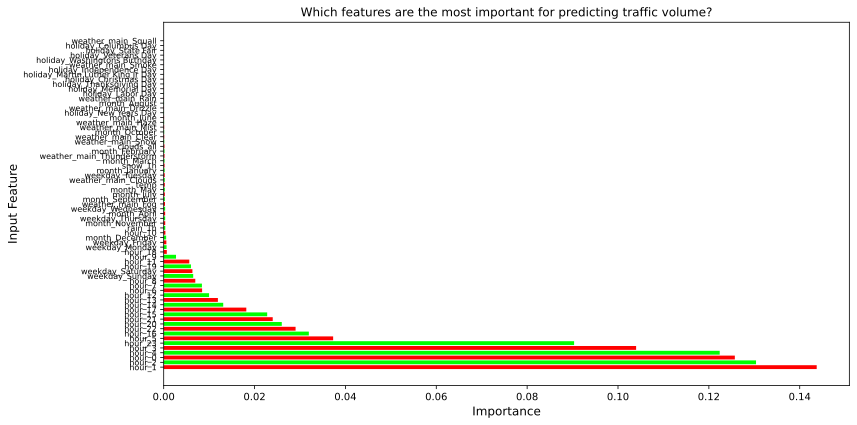

In [41]:
# Storing importance values from the trained model
importance = bst.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_x.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(12, 6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for predicting traffic volume?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();

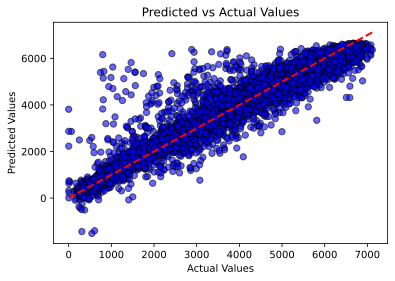

In [42]:
# Setting the figure size and resolution
plt.figure(figsize = (6, 4), dpi = 150)

# Scatter plot of actual vs predicted values
plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# 45-degree reference line (perfect predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# Axis labels and title
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10)
plt.title('Predicted vs Actual Values', fontsize = 12)

# Adjust ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [43]:
# Define MAPIE regressor
mapie = MapieRegressor(estimator = bst, # Prediction model to use
                       n_jobs = -1,
                       random_state = 42)

# Fit mapie regressor on training data
start = time.time()  
mapie.fit(train_x, train_y)
stop = time.time()             
print(f"Training time: {stop - start}s")

alpha = 0.1 # For 90% confidence level

# Use mapie.predict() to get predicted values and intervals
y_test_pred, y_test_pis = mapie.predict(test_x, alpha = alpha)

Training time: 5.360849618911743s


In [44]:
# Storing results in a dataframe
predictions = test_y.to_frame()
predictions.columns = ['Actual Value']
predictions["Predicted Value"] = y_test_pred.round(2)
predictions["Lower Value"] = y_test_pis[:, 0].round(2)
predictions["Upper Value"] = y_test_pis[:, 1].round(2)

# Take a quick look
predictions.tail(5)

,Actual Value,Predicted Value,Lower Value,Upper Value
10842,1749,1940.699951,1135.53,2475.22
5921,5825,5491.589844,4878.66,6073.59
39605,6150,6378.169922,5538.70,6735.47
33967,3205,2788.840088,2095.33,3284.48
2178,1295,1222.369995,726.11,1944.41


In [45]:
coverage = regression_coverage_score(test_y,           # Actual values
                                     y_test_pis[:, 0], # Lower bound of prediction intervals
                                     y_test_pis[:, 1]) # Upper bound of prediction intervals

coverage_percentage = coverage * 100
print(f"Coverage: {coverage_percentage:.2f}%")

Coverage: 91.12%


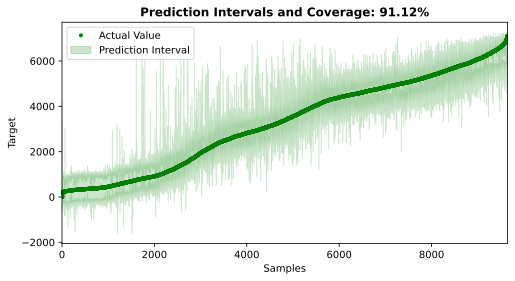

In [46]:
# Sort the predictions by 'Actual Value' for better visualization and reset the index
sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

# Create a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual values with green dots
plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

# Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["Lower Value"],
                 sorted_predictions["Upper Value"],
                 alpha=0.2, color="green", label="Prediction Interval")

# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the limit for the x-axis to cover the range of samples
plt.xlim([0, len(sorted_predictions)])

# Label the x-axis and y-axis with appropriate font size
plt.xlabel("Samples", fontsize=10)
plt.ylabel("Target", fontsize=10)

# Add a title to the plot, including the coverage percentage, with bold formatting
plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# Add a legend to the plot, placed in the upper left, with specified font size
plt.legend(loc="upper left", fontsize=10);

In [47]:
T_pickle = open('bst_traffic.pickle', 'wb') 

# Write RF model to the file
pickle.dump(mapie, T_pickle) 

# Close the file
T_pickle.close()